In [1]:
head(iris)





Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [17]:
# 다중공선성 : 독립변수들 간의 강한 상관계수를 파악하는 것
# 상관관계 확인
cor(iris[1:4])





,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


### 0.87, 0.96 처럼 높은 상관계수 때문에 회귀분석시 다중 공선성 문제가 발생하여    
### 결과가 왜곡될 수 있음      
### 따라서 주성분을 만들어 다중 공선성 문제를 해결.       
### 데이터가 한쪽에 편향되어 있기 때문에 표준화 작업을 하고 y변수는 species는 따로 붙인다.   

In [18]:
# 데이터 표준화 작업 -- 함수사용
log.ir <- scale(iris[,1:4])
head(log.ir)   # x 변수가 될 것
ir.species <- iris[,5]
head(ir.species)  # y 변수가 될 것





Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

In [14]:
# prcomp() : 주성분 분석함수
# 데이터를 표준화 시키면서 주성분 분석을 실행
# center = T : 중앙값을 0으로
# scale = T : 분산을 1로 
ir.pca <- prcomp(log.ir, center = T, scale = T )
ir.pca

# 4가지 주성분을 만들어줌
# 각각 요소에 PC 1 2 3 4 를 곱해줘야 표준화된 데이터를 얻는 다는 뜻이다.

(0.7195664  * Petal.Length)









Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

pc1 = (0.5210659 * Sepal.Length) + (-0.2693474  * Sepal.Width) +...+(0.5648565  * Petal.Width) 

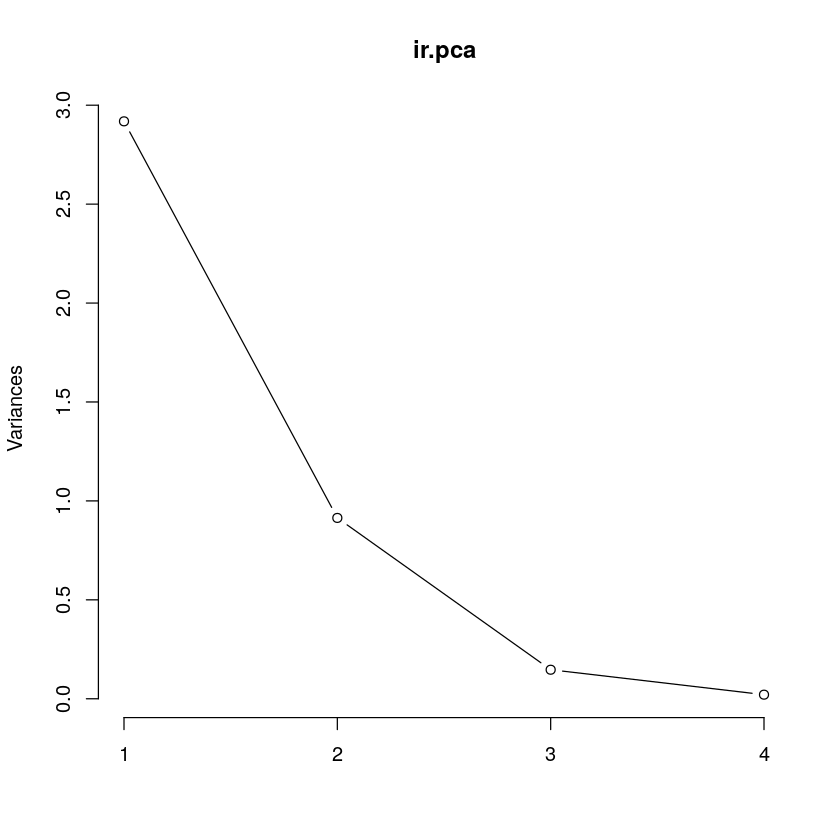

In [15]:
plot(ir.pca, type="l")





그림처럼 3번부터 기울기가 줄어드는 거을 알 수 있음   

이때 기울기가 꺾이는 3번을 elbow point 라고 한다.   

이 포인트를 기준으로 그 위의 주벙분을 선택하여 사용하지만   

plot만으로는 주성분을 선택하기 분족하다.     

In [16]:
summary(ir.pca)

# 주성분 
Proportion of Variance 0.7296 0.2285 0.03669 0.00518

# 합산 -  각 누적으로 pc1 부터 pc4 까지 갔을 때 얼만큼 예측가능?
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000





Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

신뢰구간은 최소한 95% 신뢰구간을 맞춰야 한다.     

95%의 신뢰구간에서 회귀식을 세운다 -- pc1과 pc2 를 가지고 회귀식을 세우면     
(0.5210659 Sepal.Length) + (-0.2693474 Sepal.Width)      

99%의 신뢰구간에서 회귀식을 세운다 -- pc1과 pc2 를 가지고 회귀식을 세우면     
(0.5210659 Sepal.Length) + (-0.2693474 Sepal.Width) + (0.7195664  * Petal.Length)

100%의 신뢰구간에서 회귀식을 세운다 -- pc1과 pc2 를 가지고 회귀식을 세우면     
(0.5210659 Sepal.Length) + (-0.2693474 Sepal.Width) + (0.7195664  * Petal.Length) +(0.5648565 * Petal.Width)    

상관관계가 85% 이상 넘어가면 데이터가 거의 쌍둥이기 때문에 데이터의 의미가 없어진다?

## Pasta

In [139]:
data <- read.table('../Data/pasta.txt',header = T)
data
str(data)





,noodle,dishes,sauce
pesto_alla_Genovese,2,4,5
Marinara,1,5,1
Puttanesca,5,3,4
Primavera,2,2,3
Vongole,3,5,5
Boscaiola,4,3,2
Ragu,4,4,3
Alfredo,1,2,1
Bechamel,3,3,2
Carbonara,5,5,3


'data.frame':	10 obs. of  3 variables:
 $ noodle: int  2 1 5 2 3 4 4 1 3 5
 $ dishes: int  4 5 3 2 5 3 4 2 3 5
 $ sauce : int  5 1 4 3 5 2 3 1 2 3


In [112]:
summary(data)





     noodle      dishes         sauce     
 Min.   :1   Min.   :2.00   Min.   :1.00  
 1st Qu.:2   1st Qu.:3.00   1st Qu.:2.00  
 Median :3   Median :3.50   Median :3.00  
 Mean   :3   Mean   :3.60   Mean   :2.90  
 3rd Qu.:4   3rd Qu.:4.75   3rd Qu.:3.75  
 Max.   :5   Max.   :5.00   Max.   :5.00  

In [106]:
# 상관행렬
# 다중 공선성 문제는 없다? - 85 % 미만이면 데이터를 사용할 수 있다.!!!!!!!!!!!!!!!!!!!!!!!!@!@!@!@!@!@!@!@!@!@!@
cor(data)





,noodle,dishes,sauce
noodle,1.0000000,0.1905002,0.3600411
dishes,0.1905002,1.0000000,0.3004804
sauce,0.3600411,0.3004804,1.0000000


In [108]:
p1 <- prcomp(data, scale = T, center =  T)
p1





Standard deviations (1, .., p=3):
[1] 1.2541347 0.9022241 0.7830312

Rotation (n x k) = (3 x 3):
             PC1        PC2        PC3
noodle 0.5715110 -0.6044710  0.5549685
dishes 0.5221161  0.7896069  0.3223595
sauce  0.6330639 -0.1055260 -0.7668731

In [109]:
summary(p1)

# Proportion of Variance 0.5243 0.2713 0.2044 -  예측력!

# Cumulative Proportion  0.5243 0.7956 1.0000





Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.2541 0.9022 0.7830
Proportion of Variance 0.5243 0.2713 0.2044
Cumulative Proportion  0.5243 0.7956 1.0000

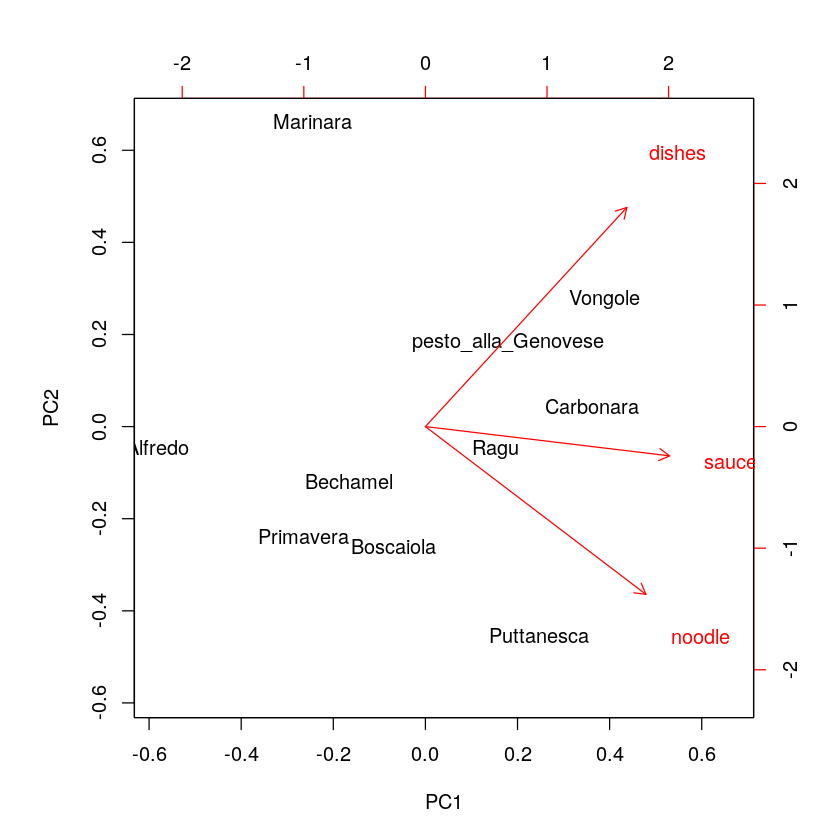

In [115]:
# 주성분을 토대로 그래프 작성
biplot(p1)

# 그래프 해석  --  biplot 은 컬럼 기준 점수 차이이다
# 화살표를 기준으로 dishes dㅔ서는 봉골레가 가장 높게 평가 Premavera 가 가장 낮게 평가
# 소스는 Carbonara 최고 이속 Alfredo 가장 낮게 평가 되엇다
# 면은 Puttanesca 가 높게 평가 되었고 Marinara 가 가장 낮게 평가 되었다.









In [114]:
# 예측 -- 이 식당에서 
predict(p1)

# Proportion of Variance 0.5243 0.2713 0.2044 -  예측력 차이기 때문에
# PC1 이 50퍼센트 이므로 만약에 PC2를 사용한다고 했으면 이 점수를 PC1 기준으로 반 값을 사용해서 봐야할 것이다.





,PC1,PC2,PC3
pesto_alla_Genovese,0.7119408,0.5216497,-1.373736133
Marinara,-0.9740499,1.8911205,0.645382316
Puttanesca,0.9804158,-1.2947047,-0.002322692
Primavera,-1.0513965,-0.6781104,-0.864614382
Vongole,1.5401350,0.7888582,-0.726820118
Boscaiola,-0.2766766,-0.7435735,0.683778524
Ragu,0.6049920,-0.1436935,0.429217649
Alfredo,-2.3084890,-0.1269792,-0.178513165
Bechamel,-0.6600579,-0.3380821,0.311494336
Carbonara,1.4331863,0.1235150,1.076133664


결록적으로 PC 1 만 가지고 분석을 진행해도 상관이 없다?

# Ramen

In [151]:
ramen1 <- read.csv('../Data/라면.csv',header = T)
ramen1
str(ramen)
ramen<-data.frame(면발=ramen1$면발,포장재=ramen1$포장재,국물=ramen1$국물)
row.names(ramen) <- ramen1$라면종류
ramen





라면종류,면발,포장재,국물
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4
너구리,3,3,4
육계장,2,3,5


'data.frame':	8 obs. of  3 variables:
 $ 면발  : int  2 5 3 3 1 1 3 2
 $ 포장재: int  4 2 4 3 2 3 3 3
 $ 국물  : int  5 1 3 5 3 4 4 5


,면발,포장재,국물
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4
너구리,3,3,4
육계장,2,3,5


In [157]:
summary(ramen)

print("=============================================================summary")

# 상관행렬
# 다중 공선성 문제는 없다? - 85 % 미만이면 데이터를 사용할 수 있다.!!!!!!!!!!!!!!!!!!!!!!!!@!@!@!@!@!@!@!@!@!@!@
cor(ramen)

print("=============================================================cor")

p2 <- prcomp(ramen, scale = T, center =  T)    # 스케일 함수는 두 데이터의 편차가 심할때 정규화 시킬 때 사용가능
p2

print("=============================================================prcomp")

summary(p2)

print("=============================================================summary")













      면발          포장재          국물     
 Min.   :1.00   Min.   :2.00   Min.   :1.00  
 1st Qu.:1.75   1st Qu.:2.75   1st Qu.:3.00  
 Median :2.50   Median :3.00   Median :4.00  
 Mean   :2.50   Mean   :3.00   Mean   :3.75  
 3rd Qu.:3.00   3rd Qu.:3.25   3rd Qu.:5.00  
 Max.   :5.00   Max.   :4.00   Max.   :5.00  

[1] "=============================================================summary"


,면발,포장재,국물
면발,1.0000000,-0.1443376,-0.5499719
포장재,-0.1443376,1.0000000,0.5443311
국물,-0.5499719,0.5443311,1.0000000


[1] "=============================================================cor"


Standard deviations (1, .., p=3):
[1] 1.3598983 0.9250247 0.5431446

Rotation (n x k) = (3 x 3):
              PC1          PC2        PC3
면발    0.5246079 -0.703176912  0.4799258
포장재 -0.5207846 -0.711011926 -0.4724885
국물   -0.6734760  0.002066804  0.7392062

[1] "=============================================================prcomp"


Importance of components:
                          PC1    PC2     PC3
Standard deviation     1.3599 0.9250 0.54314
Proportion of Variance 0.6164 0.2852 0.09834
Cumulative Proportion  0.6164 0.9017 1.00000

[1] "=============================================================summary"


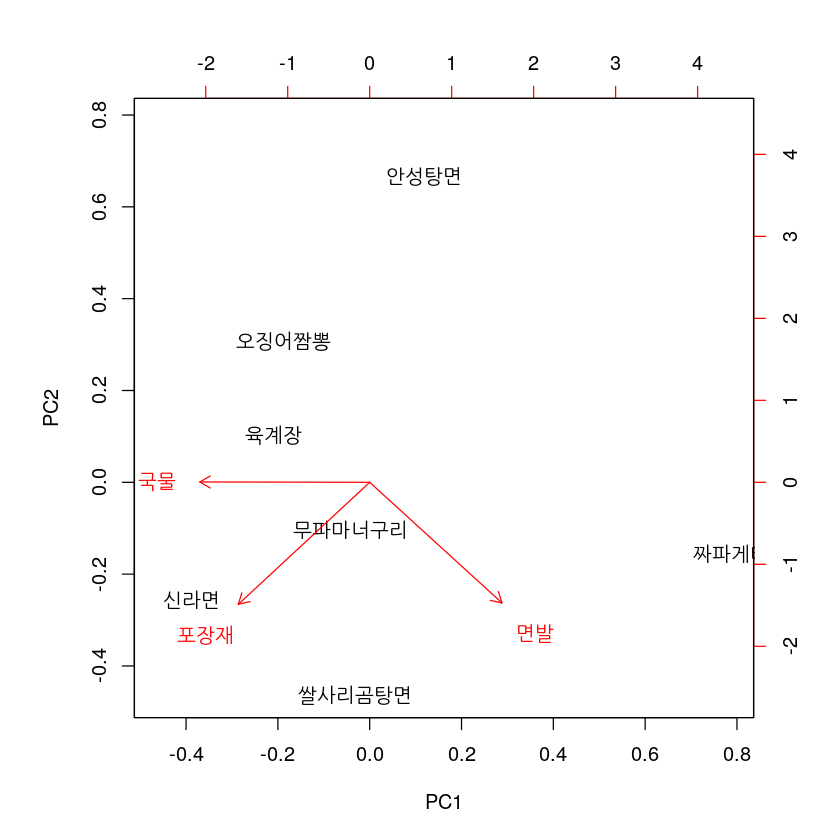

In [153]:
# 주성분을 토대로 그래프 작성
biplot(p2)





In [175]:
pre <- predict(p2)
pre

kk<-round(abs(pre[,1]) * 0.6164, 3) + round(abs(pre[,2]) * 0.2852, 3) + round(abs(pre[,3]) * 0.09834, 3)

sort(kk,decreasing = T)









,PC1,PC2,PC3
신라면,-1.4954690,-0.6701899,-0.14295664
짜파게티,3.0242580,-0.4061630,0.07762152
쌀사리곰탕면,-0.1248768,-1.2102267,-0.84098582
무파마,-0.4058597,-0.2666698,0.84863632
안성탕면,0.4516381,1.7450545,-0.32399753
오징어짬뽕,-0.7222534,0.8059624,-0.41675179
너구리,0.0790984,-0.2681581,0.31634703
육계장,-0.8065356,0.2703905,0.48208691


짜파게티       신라면     안성탕면   오징어짬뽕       육계장 쌀사리곰탕면 
       1.988        1.127        0.808        0.716        0.621        0.505 
      무파마       너구리 
       0.409        0.156